In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image as img

# **`Read image and set sigma,gamma,and delta`**


In [5]:
im_left = np.array(img.open('/HW1-left-gray.png').convert('L'), 'f')
im_right = np.array(img.open('/HW1-right-gray.png').convert('L'),'f')
sigma = 1   #Variance
gamma = 1   #Smoothness
delta0 = 3   #Threshold

# **`Sum Product Algorithm`**

In [6]:
def psi_s(sigma, d_s, i_s, j_s, im_left, im_right):
    psi_s=np.exp( (-0.5/sigma**2)*(im_left[i_s, j_s]-im_right[i_s, j_s+d_s])**2 )
    return psi_s
# define truncated gaussian compatibility function psi_st
def psi_st(gamma, d_s, d_t, delta0):
    psi_st=np.exp((-0.5/gamma**2)*np.min( np.vstack( ((d_s-d_t)**2, np.ones(10)*delta0**2) ), 0))
    return psi_st
    
def M_ts(gamma, d_s, delta0, sigma, i_s, j_s, im_left, im_right):
    d_t = np.array([0,1,2,3,4,5,6,7,8,9])
    msg = psi_st(gamma, d_s, d_t, delta0)*psi_s(sigma, d_t, i_s, j_s, im_left, im_right)
    msg = np.sum(msg)
    return msg

 #disparity values are uantized to 10leves
 #ds is varied from 0 to 10
def marginal(sigma, i_s, j_s, im_left, im_right, gamma, delta0):
    mu_s = np.zeros(10)
    #take lower,upper,left,right pixel values to calculate likelihood
    for ds in range(10):  
        mu_s[ds] = psi_s(sigma, ds, i_s, j_s, im_left, im_right)*\
        M_ts(gamma, ds, delta0, sigma, i_s-1, j_s, im_left, im_right)*\
        M_ts(gamma, ds, delta0, sigma, i_s+1, j_s, im_left, im_right)*\
        M_ts(gamma, ds, delta0, sigma, i_s, j_s-1, im_left, im_right)*\
        M_ts(gamma, ds, delta0, sigma, i_s, j_s+1, im_left, im_right)
    return mu_s


# **`Disparity Map Calculation`**

In [7]:
A = np.arange(50,240,20)
# Calculate disparity map for which likelihood is max
disparity = np.zeros([255-3+1 ,255-10-3+1])
for i_s in range(disparity.shape[0]):
    for j_s in range(disparity.shape[1]):
        disparity[i_s,j_s] = A[np.argmax(marginal(sigma, i_s+1, j_s+1, im_left, im_right, gamma, delta0))]

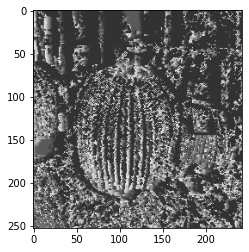

In [8]:
#convert disparity array to image using PIL
im = img.fromarray(disparity)
plt.imshow(im)
plt.show()